In [1]:
print("讀取檔案")
import pandas as pd

titanic = pd.read_csv("./data/titanic_train.csv")
titanic.head()
titanic.to_html("titanic.html", index=False)
print("寫入成功")
print("檢查欄位是否有遺失值")
print(titanic.isnull().sum())
print("檢查欄位的資料型態")
print(titanic.dtypes)
print("資料筆數與欄位數量")
print(titanic.shape)

讀取檔案
寫入成功
檢查欄位是否有遺失值
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
檢查欄位的資料型態
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
資料筆數與欄位數量
(891, 12)


In [2]:
print("Cobin欄位遺失值太高，所以準備刪除")
print("另外發現Ticket與PassengerId欄位內容於模型上沒有幫助，所以一併刪除")
try:
    titanic.drop("PassengerId", axis=1, inplace=True)
    titanic.drop("Ticket", axis=1, inplace=True)
    titanic.drop("Cabin", axis=1, inplace=True)
except:
    print("欄位已刪除")
print(titanic.shape)
print(titanic.columns)
print("年齡欄位是數值，要怎麼評估?")
print(titanic["Age"].describe())
print("圖表顯示")

Cobin欄位遺失值太高，所以準備刪除
另外發現Ticket與PassengerId欄位內容於模型上沒有幫助，所以一併刪除
(891, 9)
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
年齡欄位是數值，要怎麼評估?
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
圖表顯示


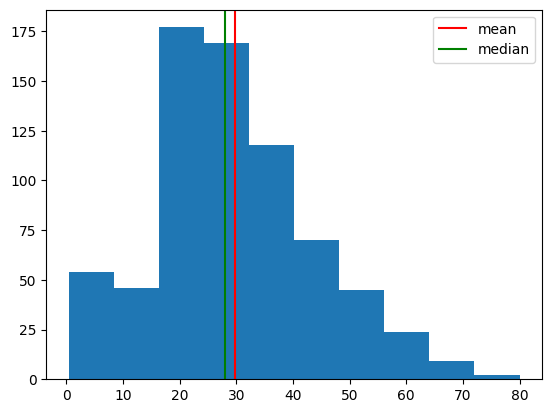

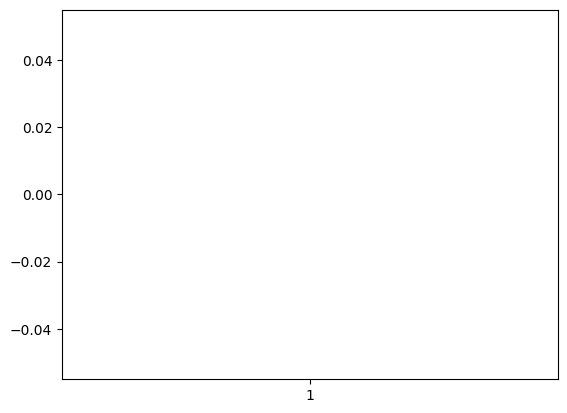

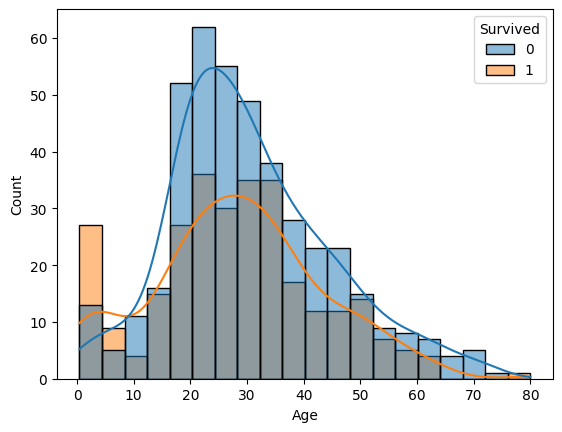

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(titanic["Age"])
plt.axvline(titanic["Age"].mean(), color="r", label="mean")
plt.axvline(titanic["Age"].median(), color="g", label="median")
plt.legend()
plt.show()
plt.boxplot(titanic["Age"])  # 有遺失值所以不能顯示
plt.show()
sns.histplot(x=titanic["Age"], hue=titanic["Survived"], kde=True)
plt.show()

In [4]:
print("文字欄位部分")
print(titanic["Sex"].value_counts())
print()
print(titanic["Embarked"].value_counts())
print()

文字欄位部分
Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



In [5]:
print("兩個欄位進行填充")
try:
    titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
    titanic["Embarked"].fillna("S", inplace=True)
except:
    print("欄位已填充")
print(titanic.isnull().sum())
print(titanic.dtypes)

兩個欄位進行填充
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


/tmp/ipykernel_11784/1812637490.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
/tmp/ipykernel_11784/1812637490.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [6]:
print("欄位處理確認為數值與文字欄位")
list1 = []  # 數值欄位
list2 = []  # 字串欄位
for i in titanic.columns:
    print("欄位名稱:", i)
    if titanic[i].dtype == object:
        try:
            print("進行轉換")
            titanic[i] = titanic[i].astype("float")
            list1.append(i)
        except:
            print("不能轉換")
            list2.append(i)
    else:
        list1.append(i)
print("數值欄位:", list1)
print("文字欄位:", list2)

欄位處理確認為數值與文字欄位
欄位名稱: Survived
欄位名稱: Pclass
欄位名稱: Name
進行轉換
不能轉換
欄位名稱: Sex
進行轉換
不能轉換
欄位名稱: Age
欄位名稱: SibSp
欄位名稱: Parch
欄位名稱: Fare
欄位名稱: Embarked
進行轉換
不能轉換
數值欄位: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
文字欄位: ['Name', 'Sex', 'Embarked']


數值欄位以hist與boxplot與scatter顯示
hist可以檢視資料數量是否接近，如果數量差異很大，可評估是否合併


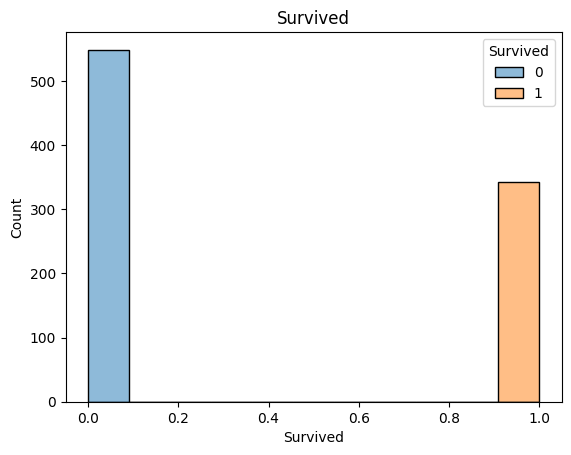

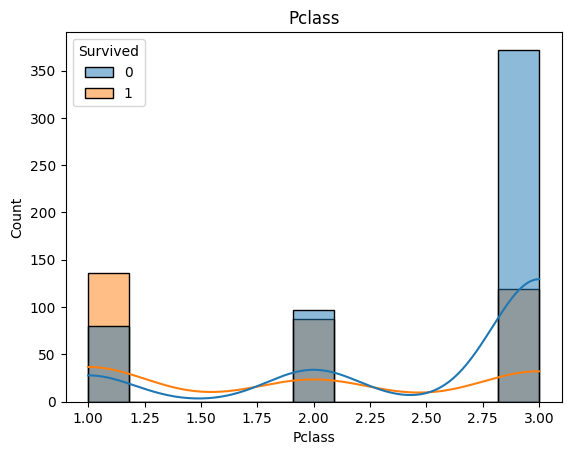

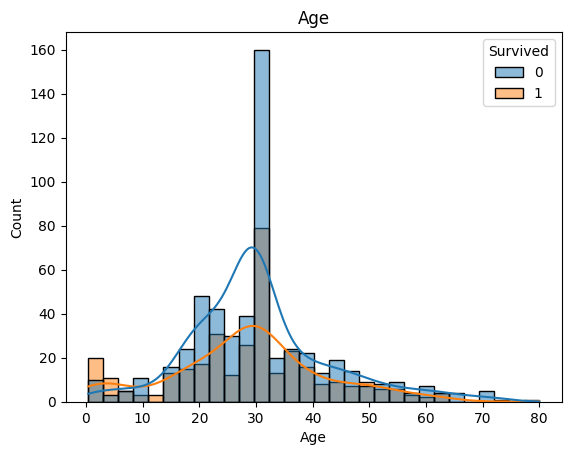

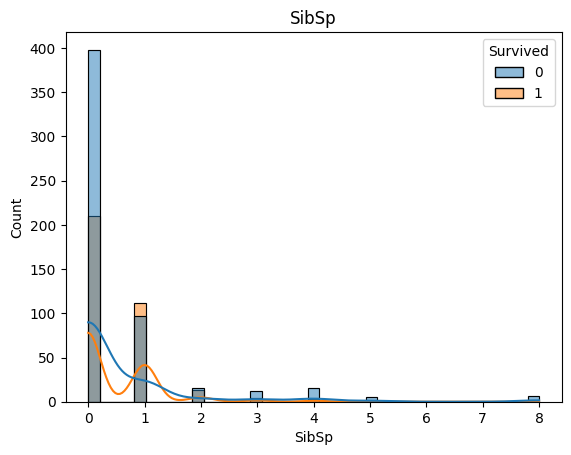

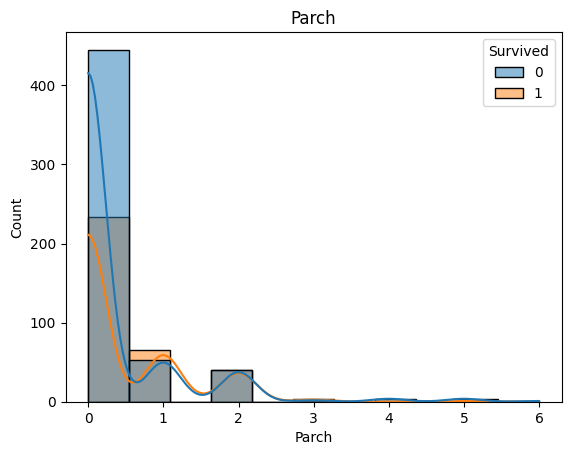

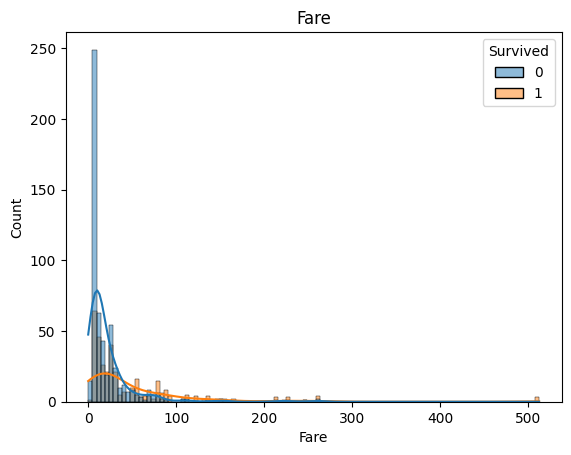

In [7]:
print("數值欄位以hist與boxplot與scatter顯示")
print("hist可以檢視資料數量是否接近，如果數量差異很大，可評估是否合併")
for i in list1:
    plt.title(i)
    sns.histplot(x=titanic[i], hue=titanic["Survived"], kde=True)
    plt.show()

數值欄位以hist與boxplot與scatter顯示
boxplot可以檢視資料集中程度


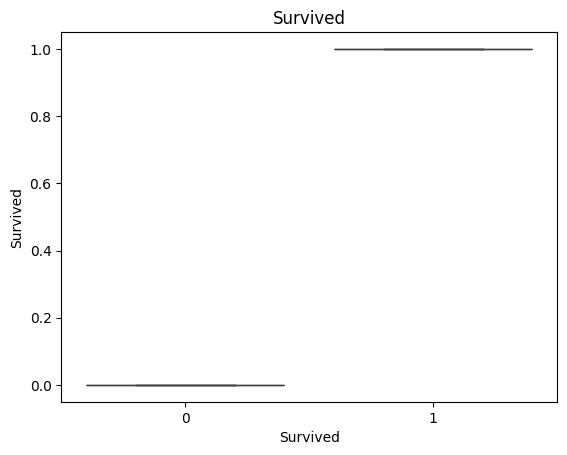

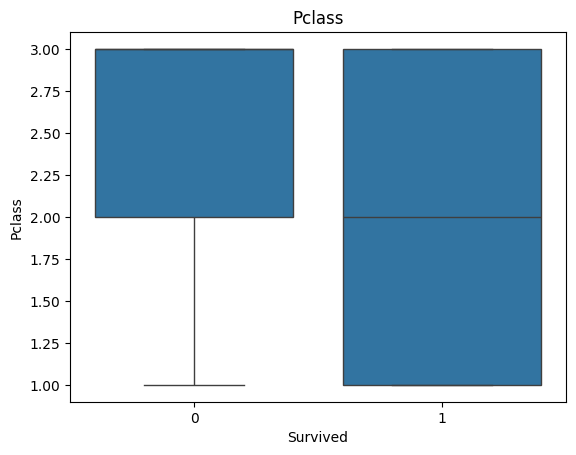

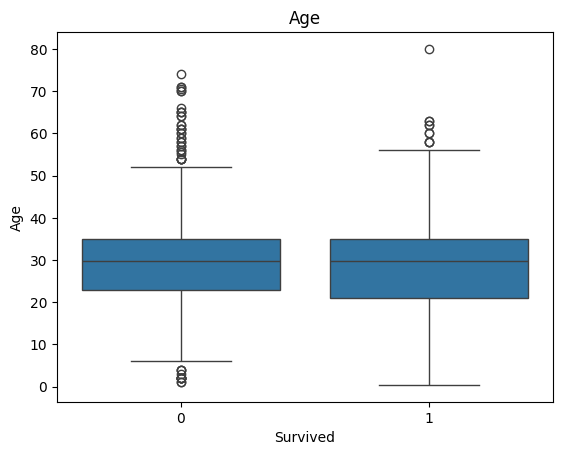

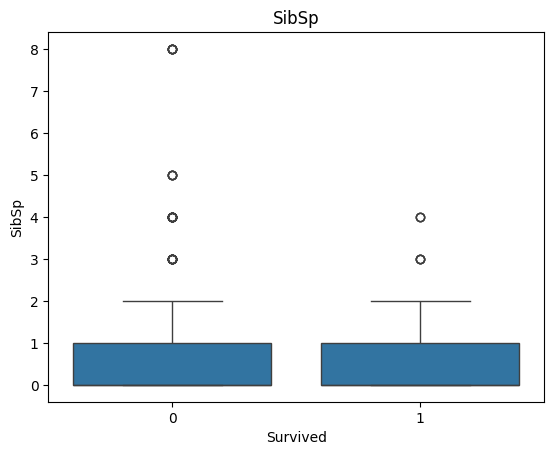

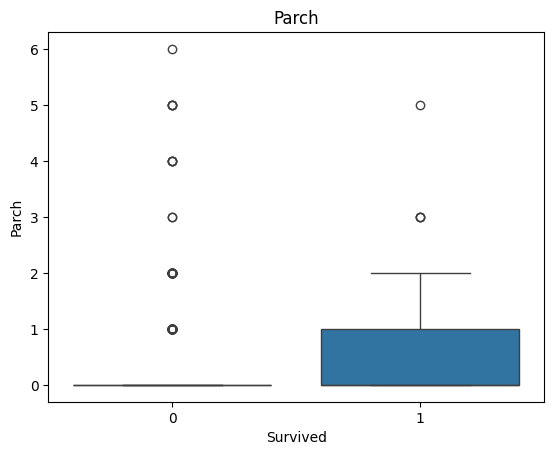

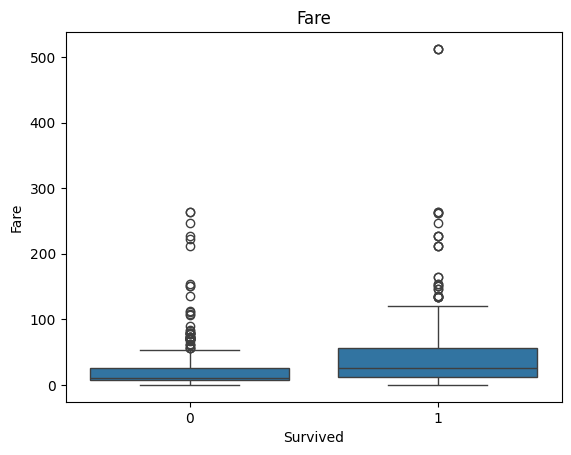

In [8]:
print("數值欄位以hist與boxplot與scatter顯示")
print("boxplot可以檢視資料集中程度")
for i in list1:
    plt.title(i)
    sns.boxplot(x=titanic["Survived"], y=titanic[i])
    plt.show()

數值欄位以hist與boxplot與scatter顯示
scatter可以檢視資料分布是否為線性


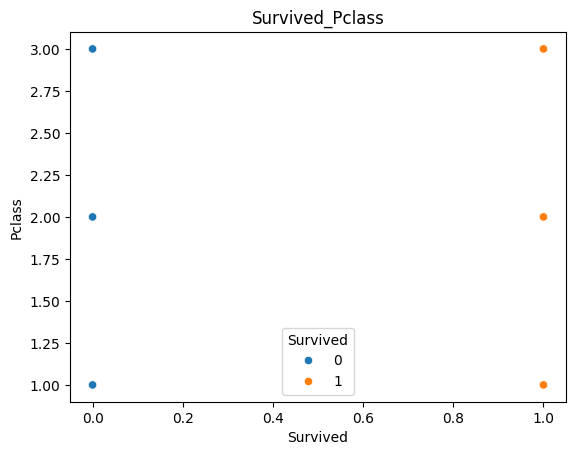

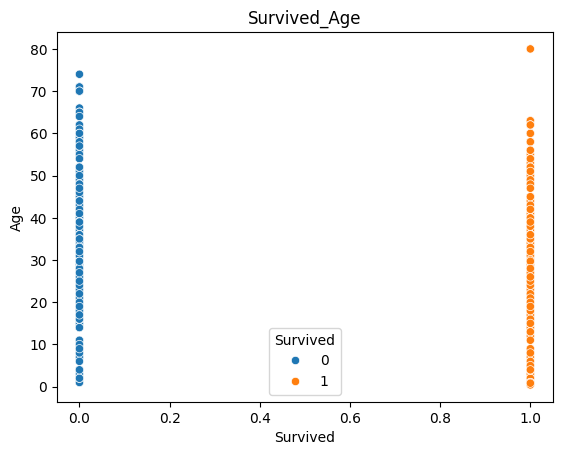

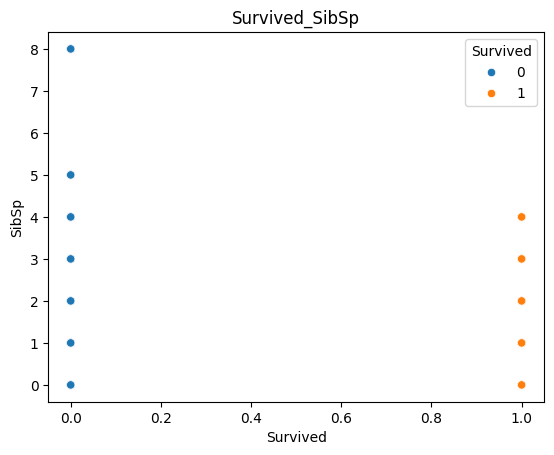

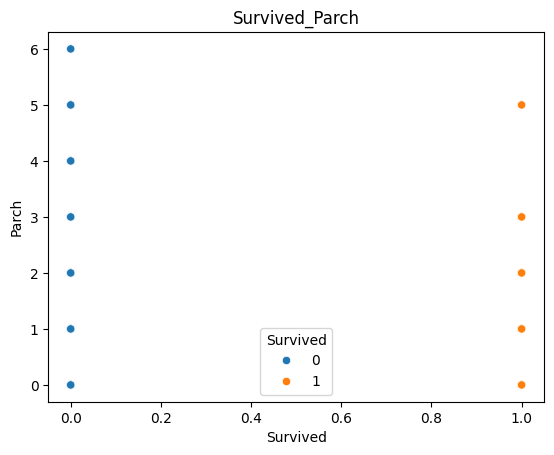

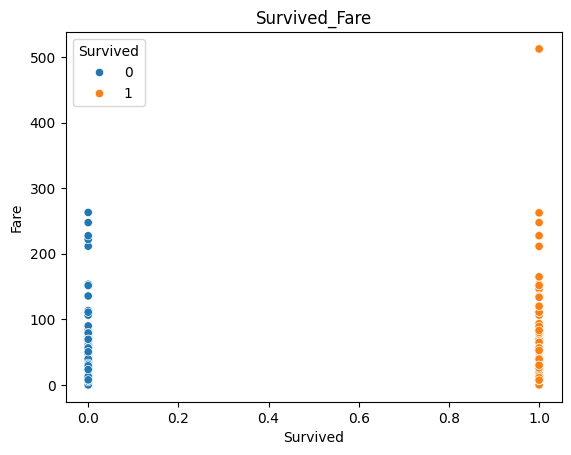

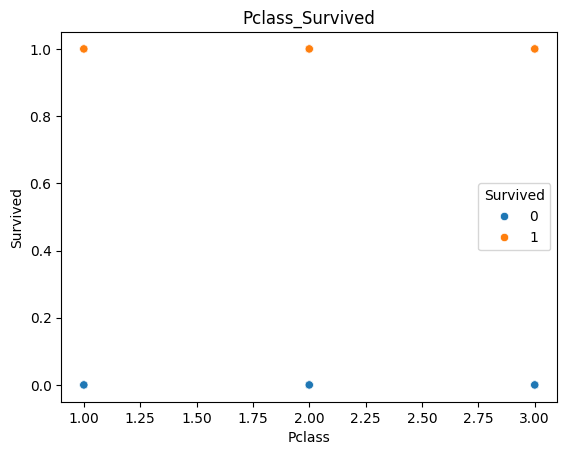

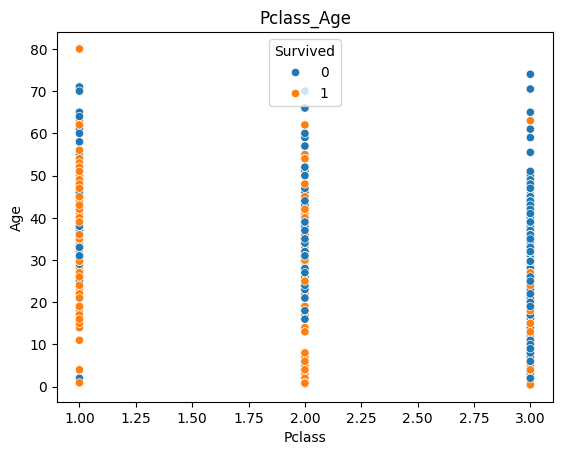

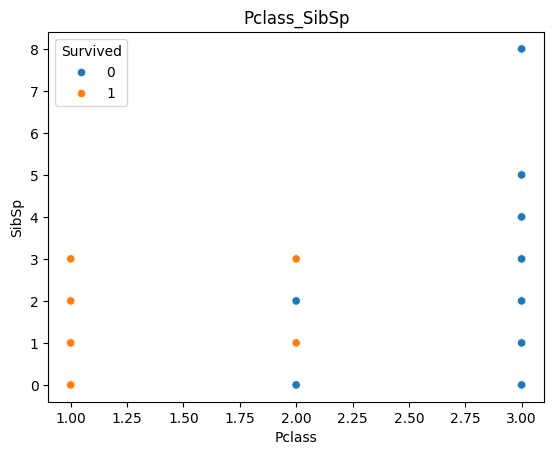

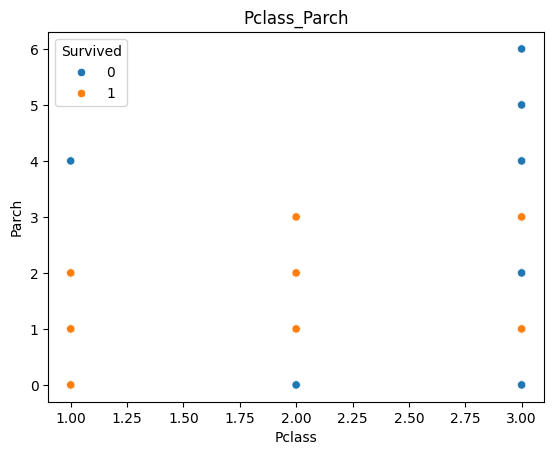

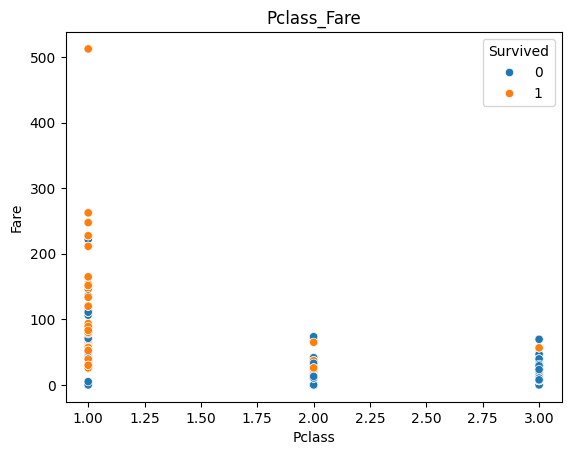

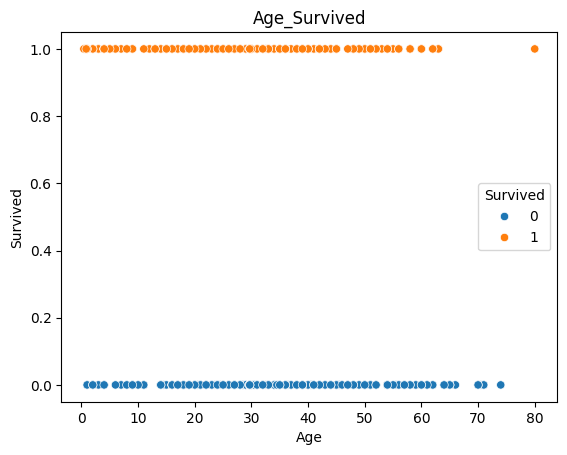

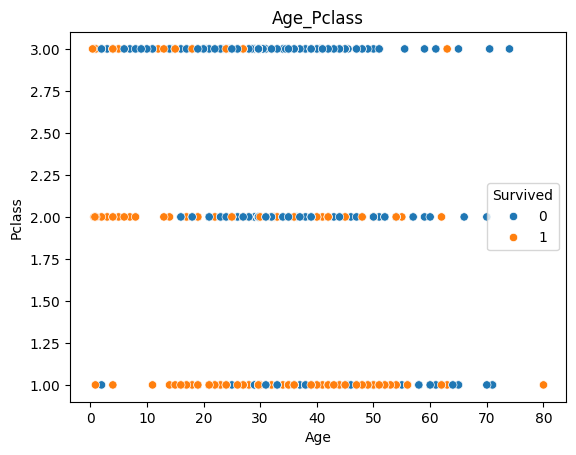

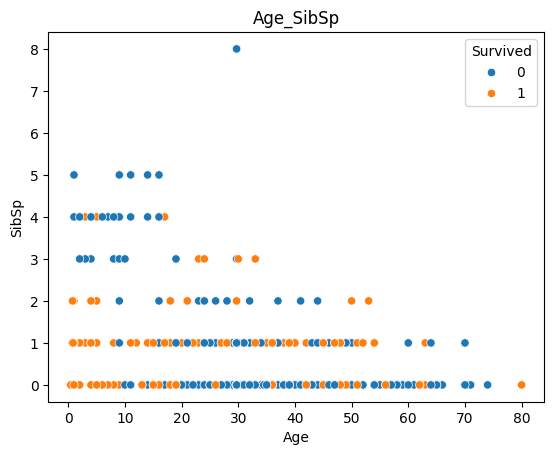

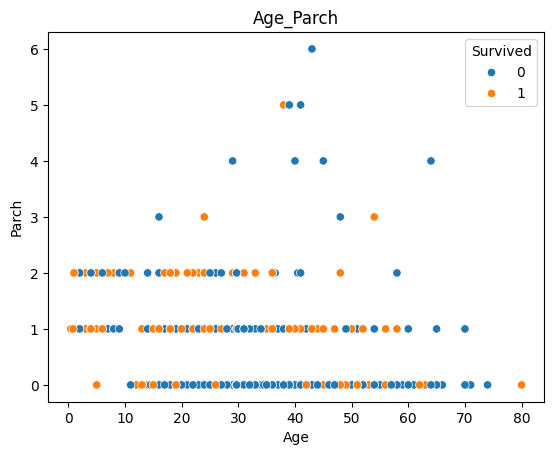

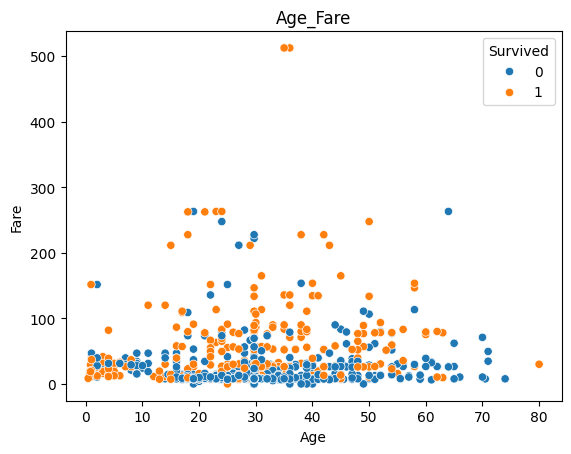

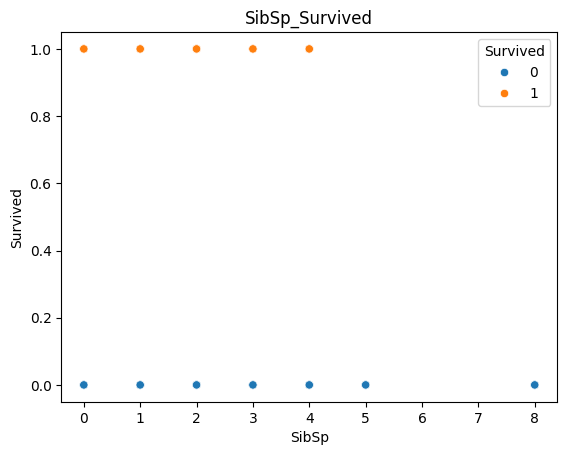

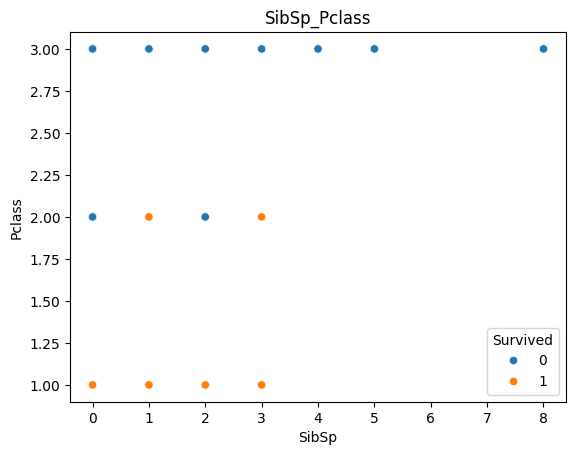

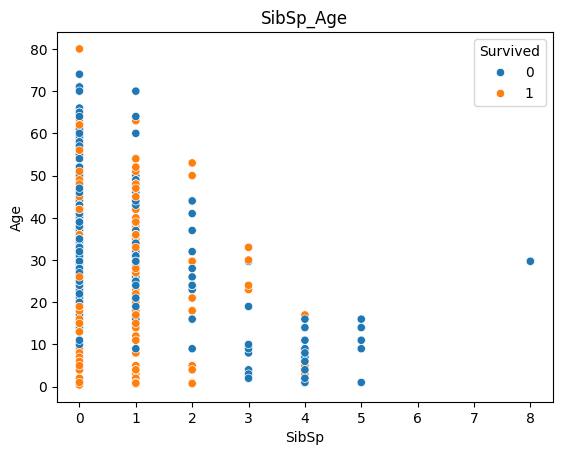

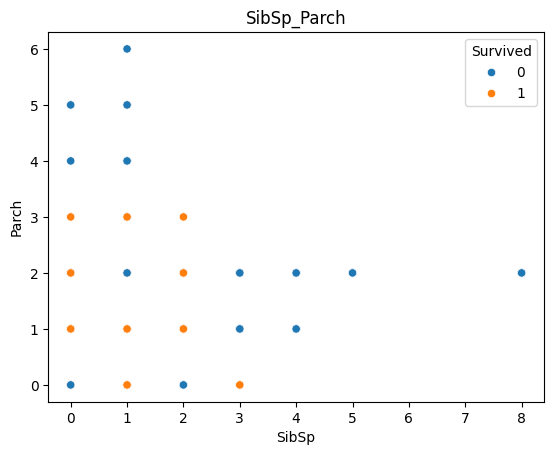

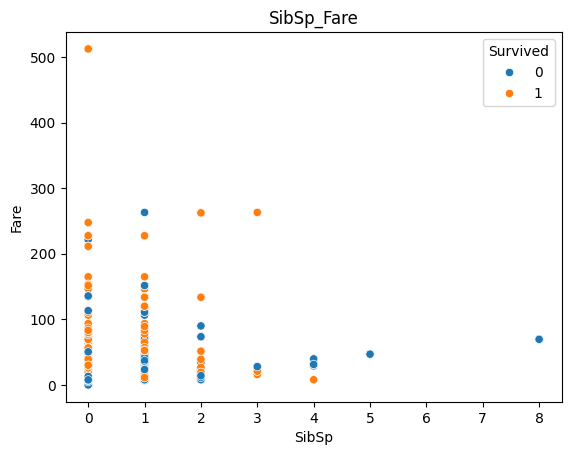

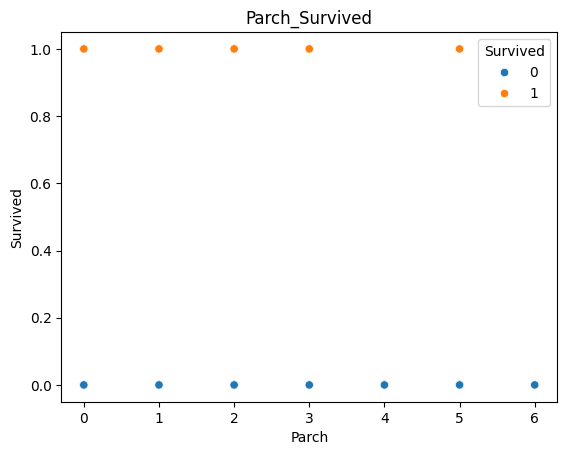

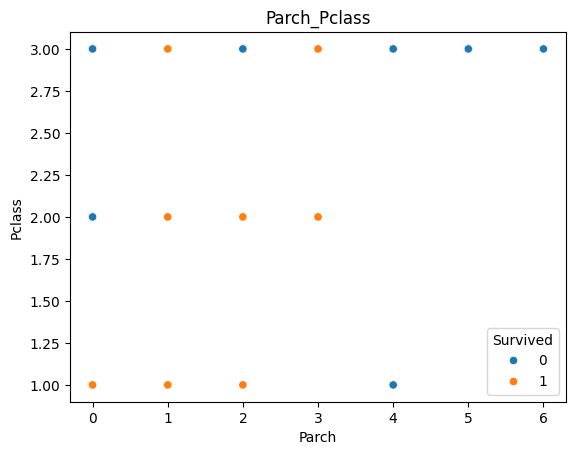

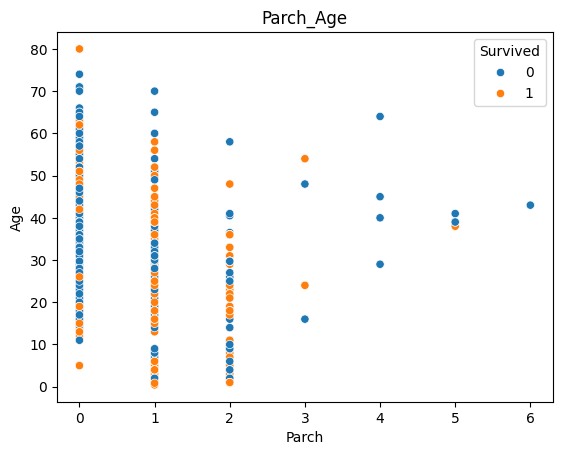

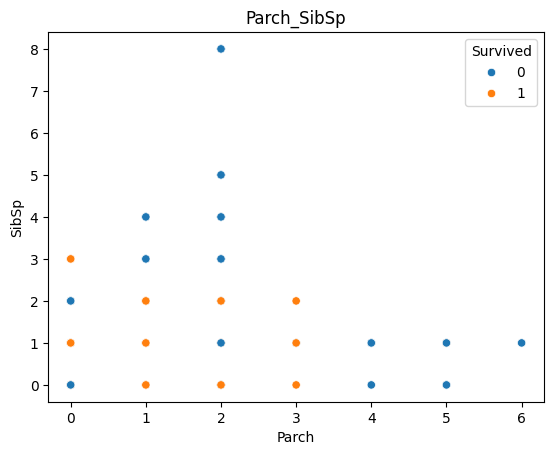

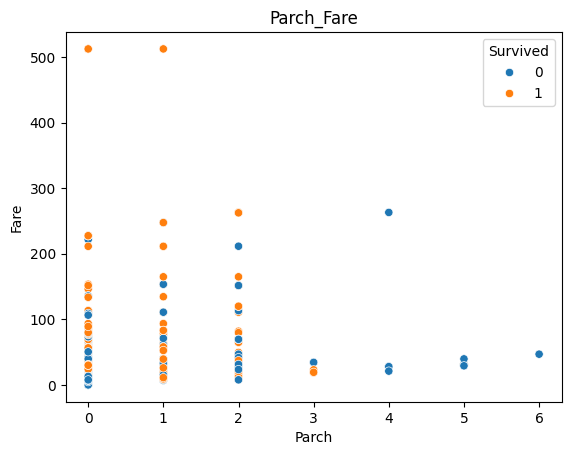

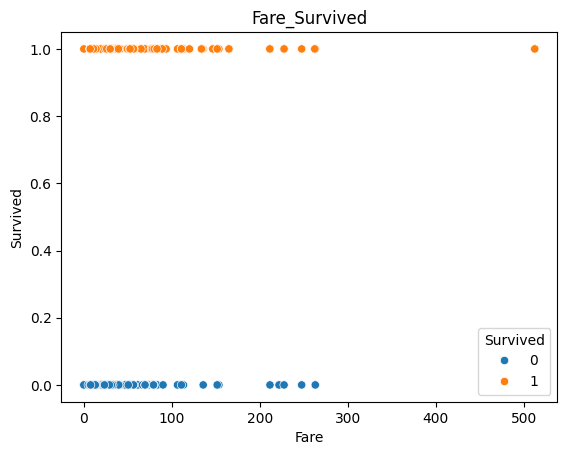

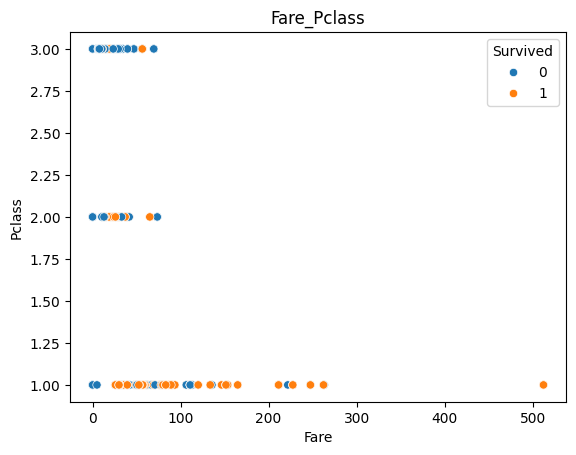

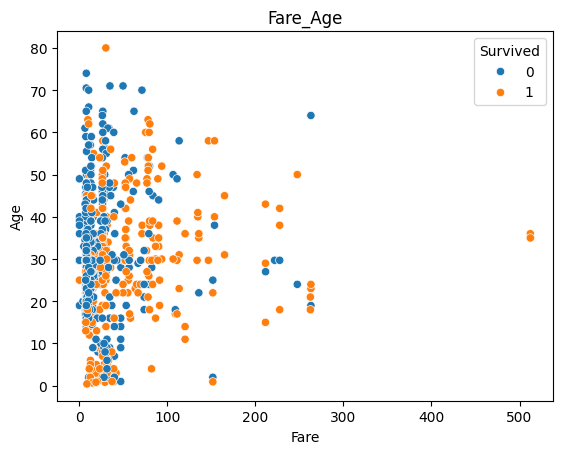

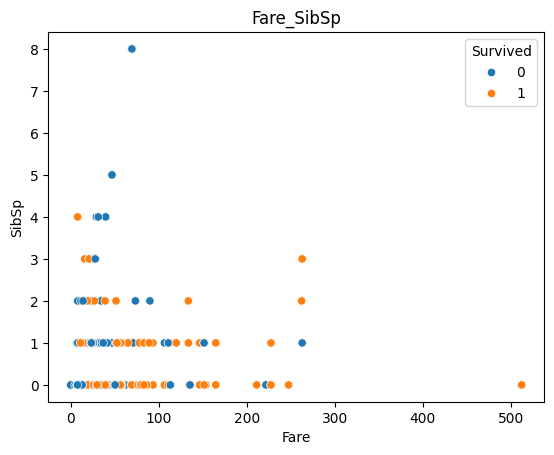

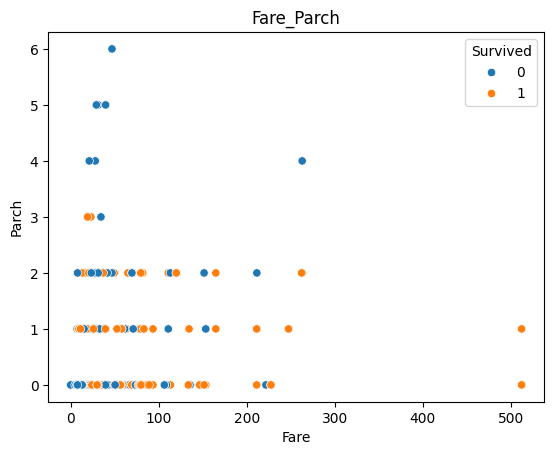

In [9]:
print("數值欄位以hist與boxplot與scatter顯示")
print("scatter可以檢視資料分布是否為線性")
for i in list1:
    for j in list1:
        if i != j:
            plt.title(i + "_" + j)
            sns.scatterplot(x=titanic[i], y=titanic[j], hue=titanic["Survived"])
            plt.show()

文字欄位以countplot顯示
hist可以檢視資料數量是否接近，如果數量差異很大，可評估是否合併


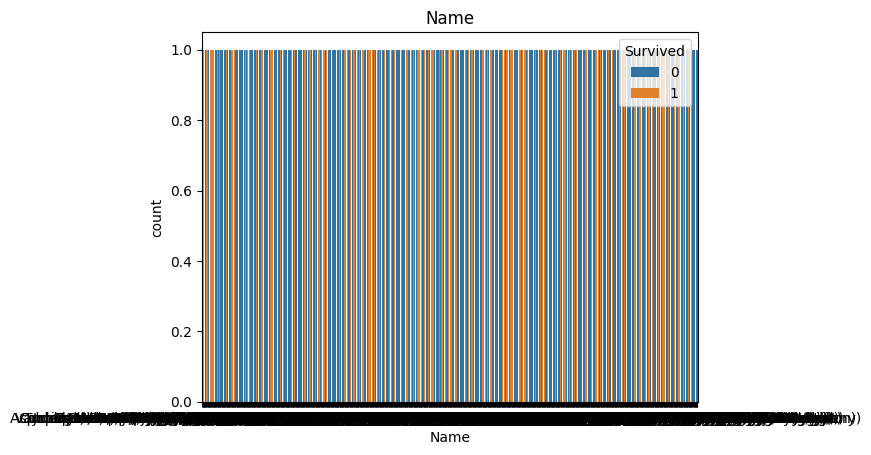

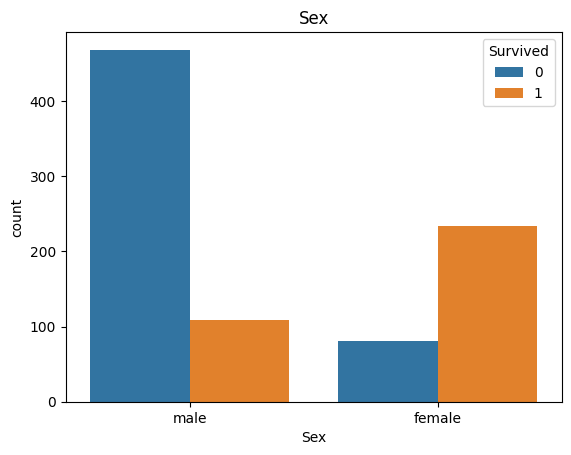

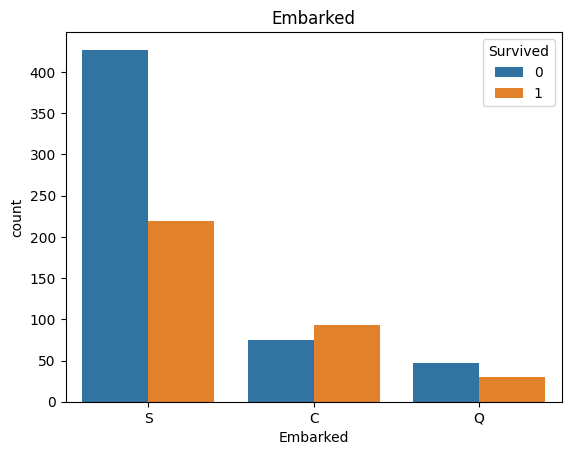

In [10]:
print("文字欄位以countplot顯示")
print("hist可以檢視資料數量是否接近，如果數量差異很大，可評估是否合併")
for i in list2:
    plt.title(i)
    sns.countplot(x=titanic[i], hue=titanic["Survived"])
    plt.show()

In [11]:
print("7.請將文字欄位進行onehot編碼處理。")
print(list2)
print(titanic["Name"].value_counts())
print("只有性別與港口需要做編碼處理")
print(titanic.shape)
list3 = ["Sex", "Embarked"]
titanic2 = titanic[list3].copy()
print(titanic2.head())
titanic3 = pd.get_dummies(titanic2)
print(titanic3.head())
print(list1)
list4 = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
titanic3[list4] = titanic[list4]
titanic3["Survived"] = titanic["Survived"]
print(titanic3.head())
print(titanic3.shape)

7.請將文字欄位進行onehot編碼處理。
['Name', 'Sex', 'Embarked']
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
只有性別與港口需要做編碼處理
(891, 9)
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0       False      True       False       False        True
1        True     Fal

8.與模型有關的步驟<br>
 0.載入相關套件<br>
 1.X與y資料準備<br>
 2.資料切割<br>
 3.依據演算法產生模型物件：依據不同演算法有不同參數<br>
 4.模型訓練<br>
 5.模型儲存：訓練成果可以儲存<br>
 6.模型載入：不用每次預測都要做訓練<br>
 7.模型預測<br>
 8.模型評估<br>


In [12]:
print("0.載入相關套件")
print("_2資料切割需要套件")
from sklearn.model_selection import train_test_split

print("_3.演算法套件")
print("LogisticRegression")
from sklearn.linear_model import LogisticRegression

print("DecisionTreeClassifier")
from sklearn.tree import DecisionTreeClassifier

print("KNN")
from sklearn.neighbors import KNeighborsClassifier

print("SVC")
from sklearn.svm import SVC

print("假設前面模型都跑不好，那該怎麼處理?-->下一個檔案再處理")
print("模型儲存載入")
import joblib

print("模型評估")
from sklearn.metrics import (
    accuracy_score,  # 準確率
    classification_report,  # 分類報告
    confusion_matrix,  # 混淆矩陣
)

0.載入相關套件
_2資料切割需要套件
_3.演算法套件
LogisticRegression
DecisionTreeClassifier
KNN
SVC
假設前面模型都跑不好，那該怎麼處理?-->下一個檔案再處理
模型儲存載入
模型評估


In [13]:
# 1.X與y資料準備
X = titanic3.iloc[:, :-1]
y = titanic3.iloc[:, -1]
# 2.資料切割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# 3.依據演算法產生模型物件：依據不同演算法有不同參數
# model=LogisticRegression()
# model=DecisionTreeClassifier()
model = KNeighborsClassifier(n_neighbors=8)  # 預設五個鄰居
# model=SVC()
# 4.模型訓練
model.fit(X_train, y_train)
# 5.模型儲存：訓練成果可以儲存
joblib.dump(model, "titanic_model.pkl")
# 6.模型載入：不用每次預測都要做訓練
model = joblib.load("titanic_model.pkl")
# 7.模型預測
predict1 = model.predict(X_train)
predict2 = model.predict(X_test)
# 8.模型評估
print("訓練資料準確率:", accuracy_score(y_train, predict1))
print("測試資料準確率:", accuracy_score(y_test, predict2))
print("訓練資料混淆矩陣:")
print(confusion_matrix(y_train, predict1))
print("測試資料混淆矩陣:")
print(confusion_matrix(y_test, predict2))
print("訓練資料分類報告:")
print(classification_report(y_train, predict1))
print("測試資料分類報告:")
print(classification_report(y_test, predict2))

訓練資料準確率: 0.7800963081861958
測試資料準確率: 0.7238805970149254
訓練資料混淆矩陣:
[[335  44]
 [ 93 151]]
測試資料混淆矩陣:
[[139  31]
 [ 43  55]]
訓練資料分類報告:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       379
           1       0.77      0.62      0.69       244

    accuracy                           0.78       623
   macro avg       0.78      0.75      0.76       623
weighted avg       0.78      0.78      0.77       623

測試資料分類報告:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       170
           1       0.64      0.56      0.60        98

    accuracy                           0.72       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.72      0.72      0.72       268

